In [59]:
# importy bilbiotek
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# wczytywanie danych z konkretnego miejsca na dysku
dane =  pd.read_csv('C:/Users/konta/Desktop/uczenie maszynowe/breast-cancer-wisconsin.data')

In [61]:
# podglad danych
print(dane)

     1000025  5   1  1.1  1.2  2 1.3   3  1.4  1.5  2.1
0    1002945  5   4    4    5  7  10   3    2    1    2
1    1015425  3   1    1    1  2   2   3    1    1    2
2    1016277  6   8    8    1  3   4   3    7    1    2
3    1017023  4   1    1    3  2   1   3    1    1    2
4    1017122  8  10   10    8  7  10   9    7    1    4
..       ... ..  ..  ...  ... ..  ..  ..  ...  ...  ...
693   776715  3   1    1    1  3   2   1    1    1    2
694   841769  2   1    1    1  2   1   1    1    1    2
695   888820  5  10   10    3  7   3   8   10    2    4
696   897471  4   8    6    4  3   4  10    6    1    4
697   897471  4   8    8    5  4   5  10    4    1    4

[698 rows x 11 columns]


In [62]:
# funkcje pomocniczne
# sprawdza czy jest to pożądana klasa
def classCheck( dana,  klasa):
    if(dana == klasa):
        return True
    return False

#sprawdza czy w danej tablicy brakuje danych
def isAnyNull(tablica):
    for zmienna in tablica:
        if(zmienna=="?"):
            return True
    return False


In [63]:
# tworzymy opis kolumn dla wczytanych danych
columny = ['Id','Clump thickness', 'uniformity of cell size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
print("Klasy: benign(niegroźny), malignant(złośliwy)")
dane.columns = columny
print("Liczba próbek w zbiorze: " + str(len(dane)))


Klasy: benign(niegroźny), malignant(złośliwy)
Liczba próbek w zbiorze: 698


In [64]:
#zliczenia klas
iloscZlosliwych=0
iloscNiegrozny=0
# klasa 4 to oznaczenie złośliwych przypadków, klasa 2 to oznaczenie zdrowych przypadków
for dana in dane['Class']:
    if(classCheck(dana,4)):
        iloscZlosliwych+=1
    else:
        iloscNiegrozny+=1

print("Ilosc Zlosliwych: "+str(iloscZlosliwych))
print("Ilość Niegroźny: " + str(iloscNiegrozny))
print("Łacznie: " + str(iloscNiegrozny+iloscZlosliwych))

Ilosc Zlosliwych: 241
Ilość Niegroźny: 457
Łacznie: 698


In [65]:
for label in columny:
    if(isAnyNull(dane[label])):
        print("Brakuje danych w kolumnie: " + str(label))


Brakuje danych w kolumnie: Bare Nuclei


In [66]:
#usuwamy brakujace dane
for x in range(1,len(columny)):
    dane = dane.drop(dane[dane[columny[x]] == '?'].index)
#Wybieramy 3 kolumny na ktorych przprowadzimy dalsze zadanie
wybaneLabel = ['Clump thickness', 'uniformity of cell size','Uniformity of Cell Shape']

In [67]:
#analiza danych
for z in wybaneLabel:
    print("Dane dla " + str(z))
    #średnie
    print("średnia: " + str(dane[z].mean()))
    #mediana
    print("Mediana: " + str(dane[z].median()))
    #max
    print("Maksymalna wartość wystepująca: " + str(pd.DataFrame.max(dane[z])))
    #min
    print("Minimalna wartość wystepująca: " + str(pd.DataFrame.min(dane[z])))
    #Standardowe odchylenie
    print("Standardowe odchylenie: " + str(pd.DataFrame.std(dane[z])))
    #kwartyle
    print("Kwartyle: ")
    print(str(dane[z].quantile([0.25, 0.75], interpolation='nearest')))
    
    print()
    

Dane dla Clump thickness
średnia: 4.441348973607038
Mediana: 4.0
Maksymalna wartość wystepująca: 10
Minimalna wartość wystepująca: 1
Standardowe odchylenie: 2.822750545931825
Kwartyle: 
0.25    2
0.75    6
Name: Clump thickness, dtype: int64

Dane dla uniformity of cell size
średnia: 3.153958944281525
Mediana: 1.0
Maksymalna wartość wystepująca: 10
Minimalna wartość wystepująca: 1
Standardowe odchylenie: 3.0662854047420183
Kwartyle: 
0.25    1
0.75    5
Name: uniformity of cell size, dtype: int64

Dane dla Uniformity of Cell Shape
średnia: 3.218475073313783
Mediana: 1.0
Maksymalna wartość wystepująca: 10
Minimalna wartość wystepująca: 1
Standardowe odchylenie: 2.9895675714773784
Kwartyle: 
0.25    1
0.75    5
Name: Uniformity of Cell Shape, dtype: int64



Histogramy


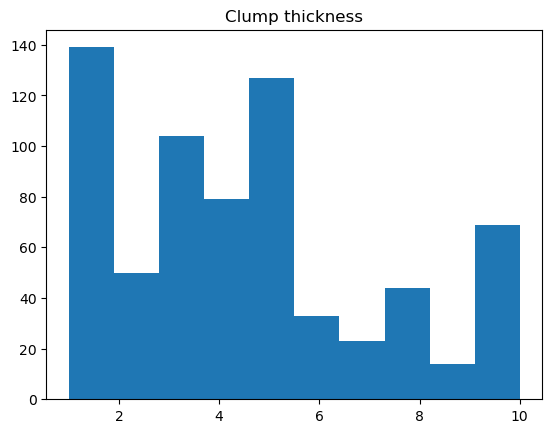

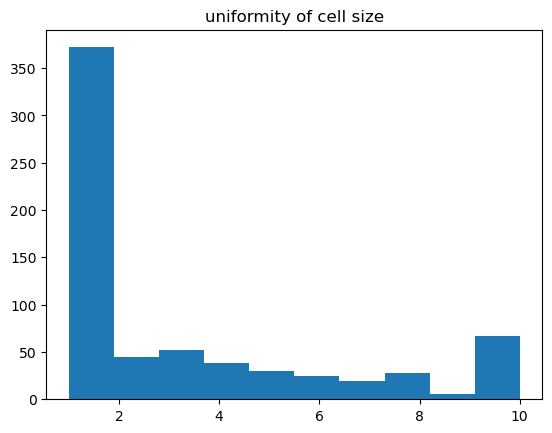

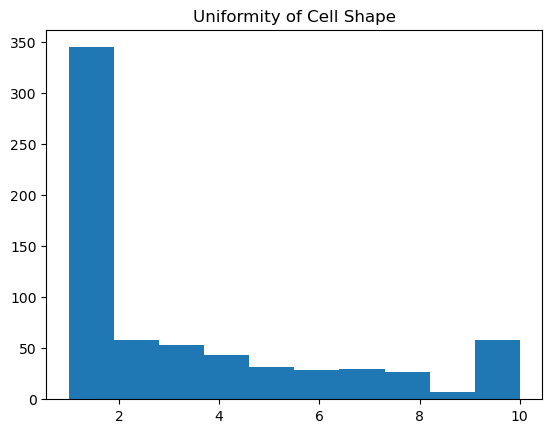

In [68]:
print("Histogramy")
for z in wybaneLabel:
    plt.figure()
    plt.title(z)
    plt.hist(dane[z])


Pudelkowy


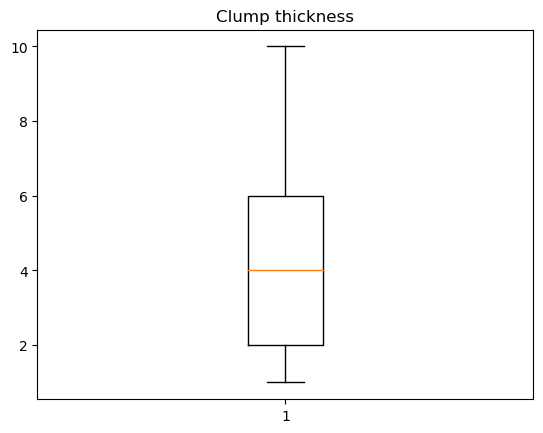

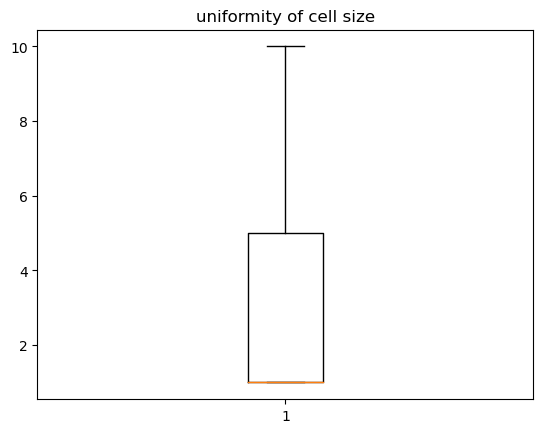

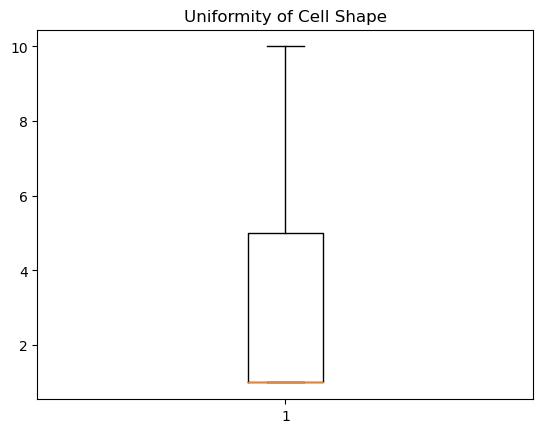

In [69]:
print("Pudelkowy")
for z in wybaneLabel:
    plt.figure()
    plt.title(z)
    plt.boxplot(dane[z])


Korelacja Clump thickness i uniformity of cell size dla Niegorźnych


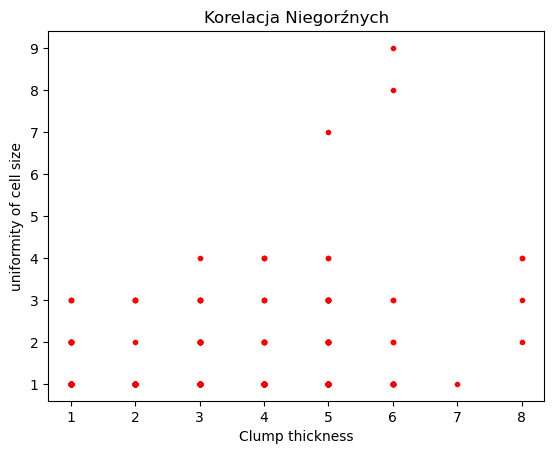

In [70]:
daneNiegrozne = dane[dane['Class'] == 2]
daneZlosliwe = dane[dane['Class'] == 4]
#print(daneZlosliwe)

print("Korelacja " +str(wybaneLabel[0])+ " i "+str(wybaneLabel[1]) + " dla Niegorźnych")
plt.title("Korelacja Niegorźnych")
plt.xlabel(wybaneLabel[0])
plt.ylabel(wybaneLabel[1])
plt.plot(daneNiegrozne[wybaneLabel[0]],daneNiegrozne[wybaneLabel[1]],"r.")


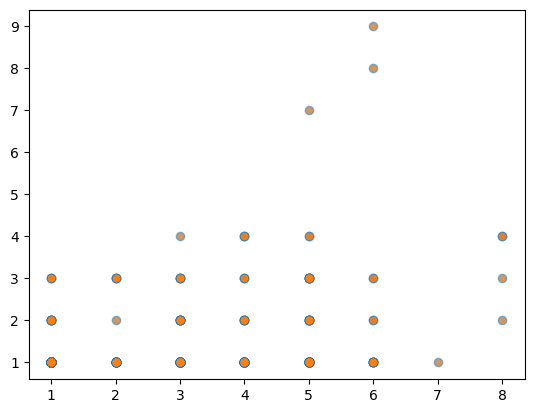

In [71]:
fig, ax = plt.subplots()
ax.scatter(daneNiegrozne[wybaneLabel[0]],daneNiegrozne[wybaneLabel[1]], alpha=0.5)

# ustawienie rozmiaru punktu na wartość większą niż domyślna
ax.scatter(daneNiegrozne[wybaneLabel[0]],daneNiegrozne[wybaneLabel[1]], s=20, alpha=0.5)

# wyświetlenie wykresu
plt.show()

Korelacja Clump thickness i uniformity of cell size dla Złośliwych


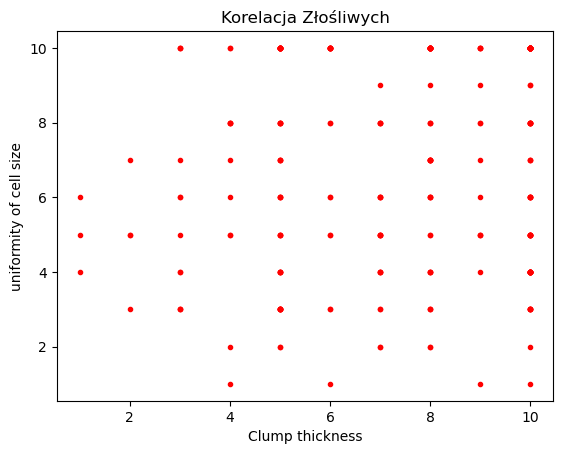

In [72]:

print("Korelacja " +str(wybaneLabel[0])+ " i "+str(wybaneLabel[1]) + " dla Złośliwych")

plt.title("Korelacja Złośliwych")
plt.xlabel(wybaneLabel[0])
plt.ylabel(wybaneLabel[1])
plt.plot(daneZlosliwe[wybaneLabel[0]],daneZlosliwe[wybaneLabel[1]],"r.")

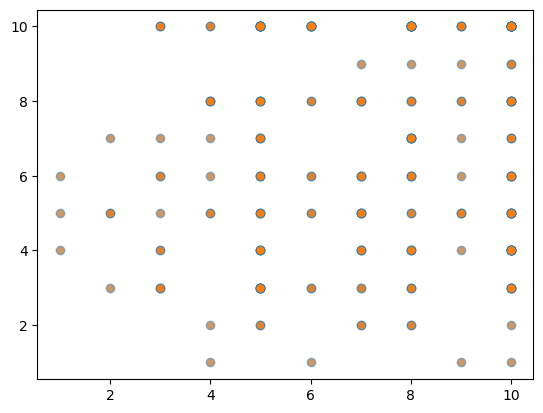

In [73]:
fig, ax = plt.subplots()
ax.scatter(daneZlosliwe[wybaneLabel[0]],daneZlosliwe[wybaneLabel[1]], alpha=0.5)

# ustawienie rozmiaru punktu na wartość większą niż domyślna
ax.scatter(daneZlosliwe[wybaneLabel[0]],daneZlosliwe[wybaneLabel[1]], s=20, alpha=0.5)

# wyświetlenie wykresu
plt.show()

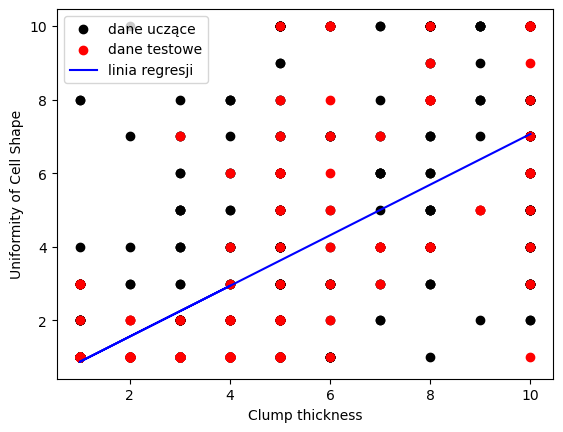

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Wybieramy cechę do modelu
X = dane[['Clump thickness']]
y = dane['Uniformity of Cell Shape']

# Dzielmy dane na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzymy i trenujemy model
model = LinearRegression()
model.fit(X_train, y_train)

# Predykcja dla zestawu testowego
y_pred = model.predict(X_test)

# Wykres punktowy dla zestawu treningowego (czarny)
plt.scatter(X_train, y_train, color = 'black', label = 'dane uczące')

# Wykres punktowy dla zestawu testowego (czerwony)
plt.scatter(X_test, y_test, color = 'red', label = 'dane testowe')

# Wykres linii regresji (niebieski)
plt.plot(X_test, y_pred, color = 'blue', label = 'linia regresji')

plt.xlabel('Clump thickness')
plt.ylabel('Uniformity of Cell Shape')
plt.legend()
plt.show()


